In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 59s 565ms/step - accuracy: 0.4969 - loss: 1.0563 - val_accuracy: 0.7024 - val_loss: 0.7064
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 37s 456ms/step - accuracy: 0.7385 - loss: 0.6706 - val_accuracy: 0.8130 - val_loss: 0.5198
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 471ms/step - accuracy: 0.8347 - loss: 0.4974 - val_accuracy: 0.8423 - val_loss: 0.4484
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 42s 475ms/step - accuracy: 0.8532 - loss: 0.4327 - val_accuracy: 0.8634 - val_loss: 0.3847
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 489ms/step - accuracy: 0.8880 - loss: 0.3655 - val_accuracy: 0.8683 - val_loss: 0.3618
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 470ms/step - accuracy: 0.8937 - loss: 0.3359 - val_accuracy: 0.9057 - val_loss: 0.3217
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 508ms/step - accuracy: 0.8957 - loss: 0.3147 - val_accuracy: 0.8959 - val_loss: 0.2948
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 461ms/step - accuracy: 0.9150 - loss: 0.2713 - val_accuracy: 0.889

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.9664 - loss: 0.1090
Test Loss: 0.12890402972698212
Test Accuracy: 0.9570870995521545
{'accuracy': [0.5838079452514648, 0.7579332590103149, 0.8380797505378723, 0.8608624935150146, 0.8873067498207092, 0.8970707654953003, 0.902359664440155, 0.9104963541030884, 0.9153783321380615, 0.9182261824607849, 0.9235150814056396, 0.9275833964347839, 0.9349064230918884, 0.9344996213912964, 0.9381611347198486, 0.9418226480484009, 0.937347412109375, 0.9430431127548218, 0.9442636370658875, 0.9479251503944397, 0.9430431127548218, 0.951993465423584, 0.9471114873886108, 0.9528071880340576, 0.9503661394119263, 0.9536208510398865, 0.9528071880340576, 0.9532139897346497, 0.9572823643684387, 0.9580960273742676, 0.9503661394119263, 0.956061840057373, 0.9532139897346497, 0.961350679397583, 0.9556549787521362, 0.9629780054092407, 0.960943877696991, 0.960943877696991, 0.9641985297203064, 0.966639518737793, 0.9637917280197144, 0.9658258557319641, 0.967453241348

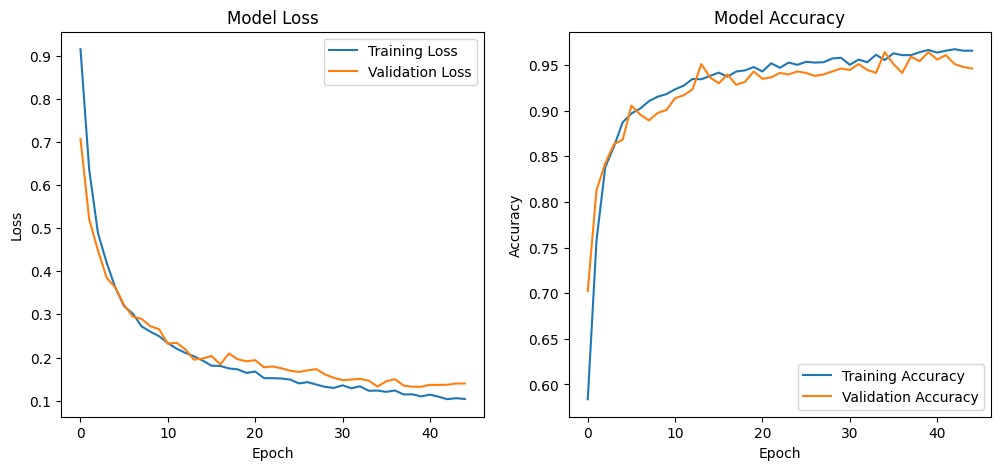

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step


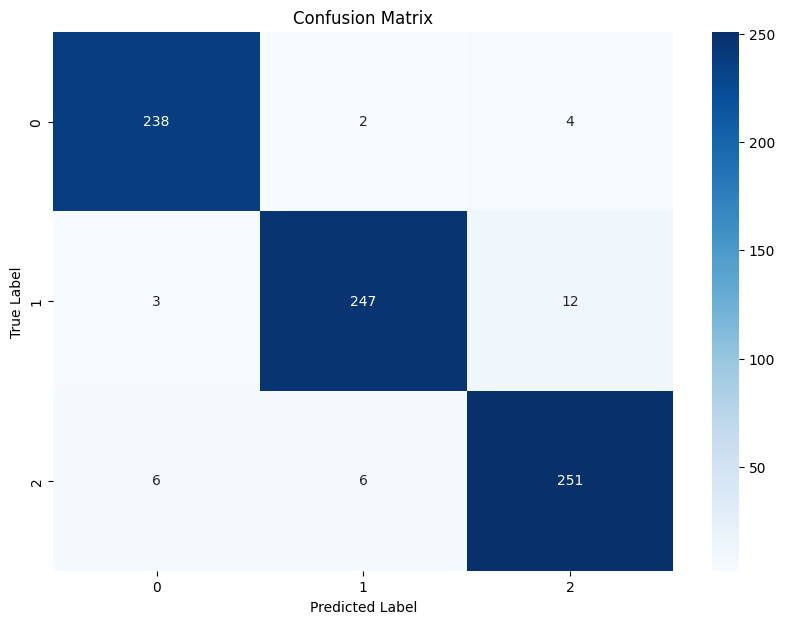

**********REPORT FOR  MOBILNETV2  MODEL********** /n
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
              precision    recall  f1-score   support

       eagle       0.96      0.98      0.97       244
       panda       0.97      0.94      0.96       262
  polar-bear       0.94      0.95      0.95       263

    accuracy                           0.96       769
   macro avg       0.96      0.96      0.96       769
weighted avg       0.96      0.96      0.96       769

******************************************


In [3]:
import argparse
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import layers, Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.python.keras.models import load_model, Model
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

def report_model(md, model_name, images, labels, classes):
    print("**********REPORT FOR ", model_name.upper(), " MODEL********** /n")
    predictions = md.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    report = classification_report(labels, predicted_labels, target_names=list(classes.keys()),
                                   labels=list(classes.values()))
    print(report)
    print("******************************************")

train_imgs = np.load('drive/MyDrive/cropped/train_imgs.npy')
train_labels = np.load('drive/MyDrive/cropped/train_labels.npy')
test_imgs = np.load('drive/MyDrive/cropped/test_imgs.npy')
test_labels = np.load('drive/MyDrive/cropped/test_labels.npy')
val_imgs = np.load('drive/MyDrive/cropped/val_imgs.npy')
val_labels = np.load('drive/MyDrive/cropped/val_labels.npy')

class_map = {'eagle': 0, 'panda': 1, 'polar-bear': 2}

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                   rotation_range=20)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                   rotation_range=20)

train_set = train_datagen.flow(train_imgs,
                                     train_labels,
                                     batch_size=32,
                                     shuffle=True)
test_set = test_datagen.flow(test_imgs,
                                   test_labels,
                                   batch_size=32,
                                   shuffle=False)
val_set = val_datagen.flow(val_imgs,
                                 val_labels,
                                 batch_size=32,
                                 shuffle=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

mobilnet_model = keras.Sequential()
mobilnet_pre = keras.applications.MobileNetV2(include_top=False,
                    weights='imagenet',
                    input_shape=(224, 224, 3),
                    pooling='avg', classes=3)
for layer in mobilnet_pre.layers:
    layer.trainable = False #weights don't update during training
#include_top=False: we can add custom layers

mobilnet_model.add(mobilnet_pre)
mobilnet_model.add(keras.layers.Flatten())
mobilnet_model.add(keras.layers.Dense(3, activation='softmax'))
#model.summary()


mobilnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = mobilnet_model.fit(train_set, epochs=50, validation_data=val_set, callbacks=[stop_early])
mobilnet_model.save('mobilnet_model.h5')


test_loss, test_accuracy = mobilnet_model.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

print(history.history)

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#Confusion matrix
test_predictions = mobilnet_model.predict(test_imgs)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert probabilities to class labels

conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report_model(mobilnet_model, "MobilNetV2", test_imgs, test_labels, class_map)